In [68]:
import pprint
import json
import pandas as pd
import matplotlib
%matplotlib inline
import datetime
import numpy as np
from sklearn import linear_model
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## History 
<div id="hist"></div>
#### Facts:
The facts below are related to tech, e-filing, and the environment.

1. In 1981, the first laptop was publically available for purchase, which weighed over 20lbs and had a 5 inch screen. [source](https://en.wikipedia.org/wiki/Laptop)
1. The internet became widely availble in the late 1980s [source](http://www.internetsociety.org/internet/what-internet/history-internet/brief-history-internet#Transition).
1. By 1990 e-filing was available nationwide. [source](https://www.irs.gov/uac/irs-e-file-a-history).
1. Less than 4% of tax returns were e-filed in 1990. [source](https://www.irs.gov/pub/irs-soi/90inar.pdf).
1. In the late 1990s, the US government set a goal for 80% of taxes being e-filed. [source](https://www.irs.gov/uac/starting-in-2011-many-paid-preparers-must-e-file-federal-income-tax-returns-for-individuals-estates-and-trusts)
1. In 2009, the acting head of the EPA authored a declaration that CO<sub>2</sub> threatens the public health and welfare of current and future generations. [source](https://www.epa.gov/climatechange/endangerment-and-cause-or-contribute-findings-greenhouse-gases-under-section-202a)
1. By 2011, the US government enacted legislation that requires paid tax preparers to e-file. [source](https://www.irs.gov/uac/starting-in-2011-many-paid-preparers-must-e-file-federal-income-tax-returns-for-individuals-estates-and-trusts) 
1. In 2014, over 90% of tax returns are e-filed. [source](https://www.irs.gov/uac/newsroom/as-efile-grows-irs-receives-fewer-tax-returns-on-paper)
1. By 2016, laptops weigh about 3lbs and have 15inch screens. [source](http://www.apple.com/macbook-pro/specs/)
1. In 2017, the acting head of the EPA made a declaration that CO<sub>2</sub> is not a primary contributor to global warming [source](https://www.nytimes.com/2017/03/09/us/politics/epa-scott-pruitt-global-warming.html)
1. Further historical facts from e-filing from the IRS are available [here](https://www.irs.gov/uac/irs-e-file-a-history)

#### Stats:  
* The following information is reported by the IRS :
    1. The total number of tax returns filed in 1990 [source](https://www.irs.gov/pub/irs-soi/90inar.pdf):
        * 113,717,138 returns filed
    1. The total number of tax returns filed in 2000 [source](https://www.irs.gov/uac/soi-tax-stats-individual-statistical-tables-by-size-of-adjusted-gross-income)
        * 129,373,500 returns filed
    1. The total number of tax returns filed in 2010 [source1](https://www.irs.gov/uac/2017-and-prior-year-filing-season-statistics) [source2](https://www.irs.gov/uac/2010-filing-season-statistics):
        * 142,449,000 returns filed
    1. The total number of tax returns filed in 2016 [source1](https://www.irs.gov/uac/2017-and-prior-year-filing-season-statistics)[source2](https://www.irs.gov/uac/newsroom/filing-season-statistics-for-the-week-ending-december-30-2016):
        * 152,544,000
    1. The total number of tax returns filed in 2025 (used 2020's total primary return figure) [source](https://www.irs.gov/pub/irs-soi/p6292.pdf) 
        * 229,259,400

* The following information is a rough approximation of e-filing percentages. [source](https://www.efile.com/efile-tax-return-direct-deposit-statistics/):
    * 1990's:  4% - 25% total returns e-file
    * 2000's: 30% - 70% total returns e-file
    * 2010's: 70% - 90% total returns e-file
    * 2016: 90% total returns e-file
    * 2025: 99.9%
  
## Energy

<div id="energy"></div>
#### Assumptions:
The information below lays out the assumptions used to build an approximation for how much CO<sub>2</sub> is used to paper file versus efile. 
* The International Post Corporation reported in their [2016 sustainability report](https://www.ipc.be/en/knowledge-centre/sustainability/sustainability-report) that mailing 1 letter in 2015 required 37.2g of CO<sub>2</sub>. We use this number as the lower bound for the carbon used to paper file taxes.   
    
* The total number of hours it takes to file a tax return is assumed to be 9 hours for 70% of returns and 22 hours for the remaining 30% [source](https://www.irs.gov/instructions/i1040a/ar03.html)  

* On average, electricity sources emit 1.222lbs CO2 per kWh (0.0005925 metric tons CO2 per kWh) [source](https://carbonfund.org/how-we-calculate/), which is assumed to be constant across all years.  

* Laptops are assumed to require 70 watts the following instantaneous watts [source1](https://support.apple.com/en-us/HT201700) [source2](https://support.apple.com/en-us/HT201796)  
    
* Laptops are assumed to be responsible for all e-filing. [NO SOURCE]


## Formulas
<div id="formulas"></div>
* The equation for calculating the total CO<sub>2</sub> from paper filings:

\begin{equation}
paperCO_2 =  (number\ of\ returns\ in\ the\ year) * (\%paper\ filing) * (CO_2\ per\ mailed\ letter) 
\end{equation}  

* The equation(s) for calculating the total CO<sub>2</sub> from e-filings included the assumption for the different time taken to prepare business and non-business tax returns: 

\begin{equation}
efile30CO_2 = (number\ of\ returns\ in\ this\ year) * (\%efile\ filing) * (30\%) * (9\ hrs\ to\ prepare\ return) * (laptop\ watts) * (CO_2\ conversion)  
\end{equation} 

\begin{equation}
efile70CO_2 = (number\ of\ returns\ in\ this\ year) * (\%efile\ filing) * (70\%) * (22\ hrs\ to\ prepare\ return) * (laptop\ watts) * (CO_2\ conversion)  
\end{equation}

\begin{equation}
efileCO_2 = efile30CO_2 + efile70CO_2  
\end{equation}


### Carbon Calcs
Using the assumptions and formulas, the following cells calculate the yearly totals. First, we'll approximate the percentage for 2025 using regression. 

In [55]:
x_train = np.array([[1990], [2000], [2010], [2016]])
y_train = np.array([[y] for y in [0.04, 0.30, 0.70, 0.90]])
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print('Coefficients: \n', regr.coef_)
print("2025 percentage: {}".format(regr.predict(2025)))


Coefficients: 
 [[ 0.03377551]]
2025 percentage: [[ 1.19428571]]


Next, we'll set up the input for the formulas that calculate the number of pounds of CO<sub>2</sub>.

In [51]:
years = [str(Y)+"-12-31T00:00:00" for Y in [1990, 2000, 2010, 2016, 2025,2026]]
years = [datetime.datetime.strptime(year, '%Y-%m-%dT%H:%M:%S') for year in years] 
returns_filed = [113717138, 129373500, 142449000,152544000,229259400,229259400]
CO2_per_letter = 37.2
CO2_per_letter2025 = 29.5
percentage_efiled = [0.04, 0.30, 0.70, 0.90, 0.981,0]
laptop_watts = 70
watts_CO2_conversion =  0.001 * 1.222

Now apply the formulas to calculate the number of pounds of CO<sub>2</sub> produced for e-filing and paper filing. 
<br>
**note: 2026 is being used as a dummy year just to see what the total CO<sub>2</sub> produced is when we have 100% paper filing.**  

In [61]:
d = {
    "lbs_of_CO2_from_eFile": {year:0 for year in years} 
    ,"percent_retruns_eFiled": {year:0 for year in years} 
    ,"lbs_of_CO2_from_paperFile": {year:0 for year in years}
    ,"percent_returns_paperFiled":{year:0 for year in years}
    ,"number_of_tax_returns":{year:0 for year in years}
    }

# iterate through years
for i,year in enumerate(years):
    c = CO2_per_letter
    if year == 2025:
        # set based on the goal for 2025 
        c = CO2_per_letter2025
    paperCO2 = returns_filed[i] * (1-percentage_efiled[i]) * c 
    efileCO2_30 = returns_filed[i] * percentage_efiled[i] * 0.70 * 9 * (laptop_watts * watts_CO2_conversion)
    efileCO2_70 = returns_filed[i] * percentage_efiled[i] * 0.30 * 22 * (laptop_watts * watts_CO2_conversion)
    e = efileCO2_70 + efileCO2_30
    d["lbs_of_CO2_from_eFile"][year] = e
    d["percent_retruns_eFiled"][year] = (percentage_efiled[i])
    d["lbs_of_CO2_from_paperFile"][year] = paperCO2
    d["percent_returns_paperFiled"][year] = 1-percentage_efiled[i]
    d["number_of_tax_returns"][year] = returns_filed[i]
    
    print(str(year.year)+":", "eFile_CO2 < paper_CO2 ==", e<paperCO2)
    

1990: eFile_CO2 < paper_CO2 == True
2000: eFile_CO2 < paper_CO2 == True
2010: eFile_CO2 < paper_CO2 == True
2016: eFile_CO2 < paper_CO2 == True
2025: eFile_CO2 < paper_CO2 == False
2026: eFile_CO2 < paper_CO2 == True


### Show Totals
The next cell shows a table of the totals.
<div id="table"></div>

In [67]:
df = pd.DataFrame(d)
df.to_csv("./yearly_lbs_of_CO2_per_tax_filing_methods.csv")
df

,lbs_of_CO2_from_eFile,lbs_of_CO2_from_paperFile,number_of_tax_returns,percent_retruns_eFiled,percent_returns_paperFiled
1990-12-31,5.019320e+06,4.061066e+09,113717138,0.040,0.960
2000-12-31,4.282778e+07,3.368886e+09,129373500,0.300,0.700
2010-12-31,1.100313e+08,1.589731e+09,142449000,0.700,0.300
2016-12-31,1.514944e+08,5.674637e+08,152544000,0.900,0.100
2025-12-31,2.481733e+08,1.620405e+08,229259400,0.981,0.019
2026-12-31,0.000000e+00,8.528450e+09,229259400,0.000,1.000


The final cell shows a bar plot of the results. <br>
**note: 2026 is being used as a dummy year just to see what the total CO<sub>2</sub> produced is when we have 100% paper filing.**  
<div id="plots"></div>

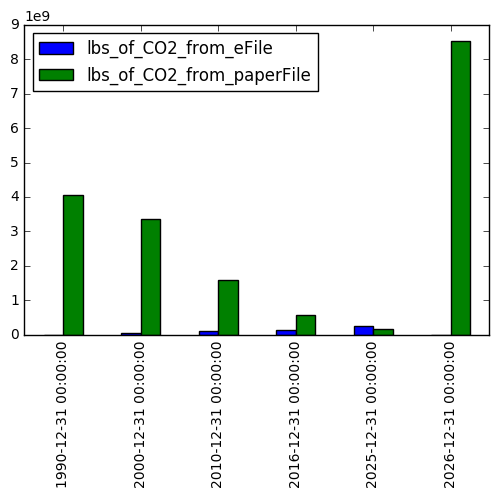

In [64]:
df[["lbs_of_CO2_from_eFile","lbs_of_CO2_from_paperFile"]].plot(kind="bar")

...the end

In [65]:
e = {}
for item in d:
    for year,value in d[item].items():
        e[item]=e.get(item,{})
        e[item][year.year] = value

In [66]:
pprint.pprint(e)

{'lbs_of_CO2_from_eFile': {1990: 5019319.816012321,
                           2000: 42827777.5653,
                           2010: 110031339.7638,
                           2016: 151494405.7536,
                           2025: 248173333.97187242,
                           2026: 0.0},
 'lbs_of_CO2_from_paperFile': {1990: 4061066432.256,
                               2000: 3368885940.0000005,
                               2010: 1589730840.0000005,
                               2016: 567463679.9999999,
                               2025: 162040543.92000017,
                               2026: 8528449680.000001},
 'number_of_tax_returns': {1990: 113717138,
                           2000: 129373500,
                           2010: 142449000,
                           2016: 152544000,
                           2025: 229259400,
                           2026: 229259400},
 'percent_retruns_eFiled': {1990: 0.04,
                            2000: 0.3,
                            2